# Module 3 Code Challenge

## Overview

This assessment is designed to test your understanding of Module 3 material. It covers:

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

_Read the instructions carefully._ You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions

For the short answer questions, _please use your own words._ The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, do your best to communicate yourself clearly.

---
## Part 1: Gradient Descent [Suggested Time: 20 min]
---

![best fit line](visuals/best_fit_line.png)

The best fit line that goes through the scatterplot up above can be generalized in the following equation: $$y = mx + b$$

Of all the possible lines, we can prove why that particular line was chosen using the plot down below:

![](visuals/cost_curve.png)

where RSS is defined as the residual sum of squares:

$$ 
\begin{align}
RSS &= \sum_{i=1}^n(actual - expected)^2 \\
&= \sum_{i=1}^n(y_i - \hat{y})^2 \\
&= \sum_{i=1}^n(y_i - (mx_i + b))^2
\end{align}
$$ 

### 1.1) What is a more generalized name for the RSS curve above? How could a machine learning model use this curve?

In [ ]:
"""
(Residual Sum of Squares)
A more generalized named is the cost function. A machine learning model uses this curve to see which parameter values 
would get us to the very bottom of the
"""

### 1.2) Would you rather choose a $m$ value of 0.08 or 0.05 from the RSS curve up above? Explain your reasoning.

In [ ]:
"""
.05 would get us the minimum loss point while .08 would have us overshooting the same point. 
"""

![](visuals/gd.png)

### 1.3) Using the gradient descent visual from above, explain why the distance between estimates in each step is getting smaller as more steps occur with gradient descent.

In [ ]:
"""
The steps are getting smaller because to get the next step, we multiply the current position by the learning rate and 
it is trying to get to the lowest value on the curve. Since we are descending the next number multiplied by the learning
rate, will be smaller than the previous step.

"""

### 1.4) What does the learning rate do in the gradient descent algorithm? Explain how a very small and a very large learning rate would affect the gradient descent.

In [ ]:
"""
The learning rate adjust how much the descent rate will be. For example, on the curve above, if we are using a learning
rate of .25 in one model, and then using a learning rate of .5 on the same model, the distance between point 1 and point 2
(using graph above) will be smaller in the .25 model and larger in the .5 model.

Very small learning rates, may take too much time to get the minimum loss point. While a large leraning rate will
overshoot the minimum loss point.
"""

---
## Part 2: Logistic Regression [Suggested Time: 15 min]
---

### 2.1) Why is logistic regression typically better than linear regession for modeling a binary target/outcome?

In [ ]:
"""
With linear regression, we are tyring to get a value to represent the relationship between a dependant variable
against other independent variables.


With logistic regression, we are looking at the probability of a value being one or the other (binary result).
"""

### 2.2) What is one advantage that logistic regression can have over other classification methods?

In [ ]:
"""
Generally, logistic regression models are easier to train.
"""

---
## Part 3: Classification Metrics [Suggested Time: 20 min]
---

![cnf matrix](visuals/cnf_matrix.png)

### 3.1) Using the confusion matrix above, calculate precision, recall, and F-1 score.

Show your work, not just your final numeric answer

In [2]:
true_pos = 54
false_pos = 4
false_neg = 12
true_neg = 30

In [6]:
# Your code here to calculate precision

# Precision_Formula = True Pos./(True Pos. + False Pos.)
precision = true_pos / (true_pos + false_pos)
precision

0.9310344827586207

In [5]:
# Your code here to calculate recall

# Recall_Form = True Pos/(True Pos. + False Neg.)
recall = true_pos / (true_pos + false_neg)
recall

0.8181818181818182

In [7]:
# Your code here to calculate F-1 score

# F1_Formula = 2 * (precision * recall) / (precision + recall)

f1 = 2 * (precision * recall) / (precision + recall)
f1

0.8709677419354839

<img src = "visuals/many_roc.png" width = "700">

### 3.2) Which ROC curve from the above graph is the best? Explain your reasoning. 

Note: each ROC curve represents one model, each labeled with the feature(s) inside each model.

In [ ]:
"""
The model that uses All Features is the best ROC curve. It shows that there is a better true positive rate 
vs false positive tradeoff.
"""

### Logistic Regression Example

The following cell includes code to train and evaluate a model

In [1]:
# Run this cell without changes

# Include relevant imports
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

network_df = pickle.load(open('write_data/sample_network_data.pkl', 'rb'))

# partion features and target 
X = network_df.drop('Purchased', axis=1)
y = network_df['Purchased']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

# scale features
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# build classifier
model = LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# get the accuracy score
print(f'The classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.')

The classifier has an accuracy score of 0.956.


### 3.3) Explain how the distribution of `y` shown below could explain the very high accuracy score.

In [8]:
# Run this cell without changes

y.value_counts()

0    257
1     13
Name: Purchased, dtype: int64

In [ ]:
"""
This shows that there is a high class imbalance. If you were to simply guess the major class, you would be right 95%
of the time.
"""

### 3.4) What method could you use to address the issue discovered in Question 3.3? 

In [ ]:
"""
We could use SMOTE to create samples of the under represented class or some technique to have the minority class
represented more.
"""

---
## Part 4: Decision Trees [Suggested Time: 20 min]
---

### Concepts 
You're given a dataset of **30** elements, 15 of which belong to a positive class (denoted by *`+`* ) and 15 of which do not (denoted by `-`). These elements are described by two attributes, A and B, that can each have either one of two values, true or false. 

The diagrams below show the result of splitting the dataset by attribute: the diagram on the left hand side shows that if we split by attribute A there are 13 items of the positive class and 2 of the negative class in one branch and 2 of the positive and 13 of the negative in the other branch. The right hand side shows that if we split the data by attribute B there are 8 items of the positive class and 7 of the negative class in one branch and 7 of the positive and 8 of the negative in the other branch.

<img src="visuals/decision_stump.png">

### 4.1) Which one of the two attributes resulted in the best split of the original data? How do you select the best attribute to split a tree at each node? 

It may be helpful to discuss splitting criteria.

In [16]:
"""
Graph A because we want to minimize our GINI impurity. We use information gain to see which variables will produce the best splits.
"""
gini1 = 1 - (13/15)**2 - (2/15)**2
gini2 = 1 - (8/15)**2 - (7/15)**2

In [17]:
print(gini1)
print(gini2)

0.23111111111111104
0.4977777777777777


### Decision Tree Example

In this section, you will use decision trees to fit a classification model to the wine dataset. The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [9]:
# Run this cell without changes

# Relevant imports 
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_wine

# Load the data 
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'target'
df = pd.concat([X, y.to_frame()], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
# Run this cell without changes
# Get the shape of the DataFrame 
df.shape

(178, 14)

In [11]:
# Run this cell without changes
# Get the distribution of the target variable 
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### 4.2) Split the data into training and test sets. Create training and test sets with `test_size=0.5` and `random_state=1`.

In [40]:
# Replace None with appropriate code  

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=1)

### 4.3) Fit a decision tree model with scikit-learn to the training data. Use parameter defaults, except for `random_state=1`. Use the fitted classifier to generate predictions for the test data.

You can use the Scikit-learn DecisionTreeClassifier (docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

In [41]:
# Your code here 
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

dtc = dtc.fit(X_train, y_train)
X_train_predict = dtc.predict(X_train)
X_test_predict = dtc.predict(X_test)

### 4.4) Obtain the accuracy score of the predictions on the test set. 

You can use the `sklearn.metrics` module.

In [45]:
# Your code imports here
import sklearn.metrics

# Replace None with appropriate code 
print('Testing Accuracy Score:', sklearn.metrics.f1_score(y_train, X_train_predict, average='micro'))
print('Accuracy Score:', sklearn.metrics.f1_score(y_test, X_test_predict, average='micro'))

Testing Accuracy Score: 1.0
Accuracy Score: 0.9101123595505618


### 4.5) Produce a confusion matrix for the predictions on the test set. 

You can use the `sklearn.metrics` module.

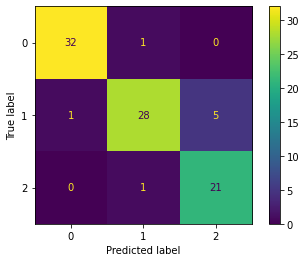

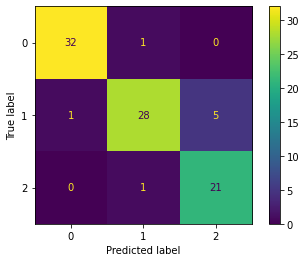

In [47]:
# Your code imports here
from sklearn.metrics import plot_confusion_matrix

# Your code here 
confusion_matrix = plot_confusion_matrix(dtc, X_test, y_test)
confusion_matrix.plot()

### 4.6) Do the accuracy score or confusion matrix reveal any substantial problems with this model's performance? Explain your answer.

In [ ]:
"""
Due to the perfect testing score, with a lower training score. The model might be overfitting.
"""